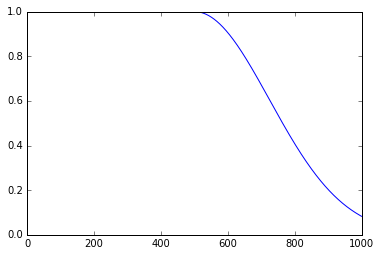

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

ymax = 1000

ng_profile = [1 if i/ymax < 0.5 else np.exp(-10*(i/ymax - 0.5)**2) for i in np.arange(ymax)]
plt.plot(ng_profile)

Ri = np.ones(ymax)*1e24

In [38]:
dt = 1e-8
dy = 1e-5
vg = 200
ng = 20e18 #to confirm

def solving():
    ''' solve one time step of the neutral continuity equation'''
    for i in np.arange(1,ymax):
        ng_profile[i] = ng_profile[i] - dt*Ri[i]/ng - (
            ng_profile[i] - ng_profile[i-1])*dt*vg/dy

In [39]:
Nt = 300

# initialization function: plot the background of each frame
def init():
    line.set_data([[], []])
    return [line]

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 1, ymax)
    
    y = ng_profile
    line.set_data(x, y)
    solving()
    
    return (line,)


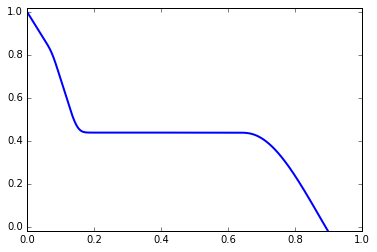

In [40]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-0.02, 1.02))

line, = ax.plot([], [], lw=2)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=20, blit=True)
#display
HTML(anim.to_html5_video())